In [ ]:
#How does day of the week and hour of the day affect instacart orders?

#I will exclude the testing datasets and focus on the prior orders data in this examination

#Using the instacart orders, products and order_products__prior datasets for instacart I will examine the following:
# the day(s) of the week which has the most orders
# the time of day where the most orders are placed
# what time of day/day of week do the greatest size orders placed
# during the most frequented time what products are ordered the most.

#Hypotheisis
#Looking at the data and assuming that 0 is Sunday the most orders are placed on Sunday and Monday.  It also appears that most of the orders are placed between 5-6pm.  
#My hypotheisis is that the greatest order sizes will occur during the 4-6pm timeslot as people are ordering dinner for the evening.  The greatest order sizes will occur on Sunday and Monday as people are ordering groceries for the week.
#Looking to predict the size of the order depending on the day of the week and the hour of the day  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = '/Users/iliaash/Documents/GA_data_science_class/ds_class/final_project/instacart_2017_05_01/orders.csv'
order = pd.read_csv(file)
order.head()

#remove the training data
train = order.loc[:,'eval_set'] != 'train'
order = order.loc[train,:]
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
file = '/Users/iliaash/Documents/GA_data_science_class/ds_class/final_project/instacart_2017_05_01/products.csv'
product = pd.read_csv(file)
product.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
file = '/Users/iliaash/Documents/GA_data_science_class/ds_class/final_project/instacart_2017_05_01/order_products__prior.csv'
order_product = pd.read_csv(file)

#inner join order product to the order dataframe on order_id
orders =pd.merge(order, order_product)
#inner join orders and product on product_id
orders1 = pd.merge(orders,product)
orders1.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7


In [5]:
#count the number of items in each order
order_size=orders1.groupby(['order_id','order_dow','order_hour_of_day'])['product_name'].count().reset_index(name='order_size')


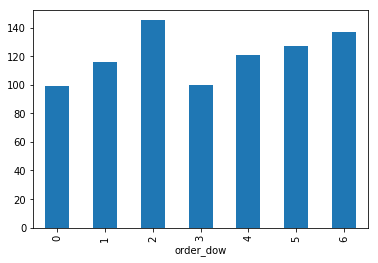

In [8]:
#days with the largest order sizes
order_size.groupby('order_dow')['order_size'].max().plot(kind='bar');

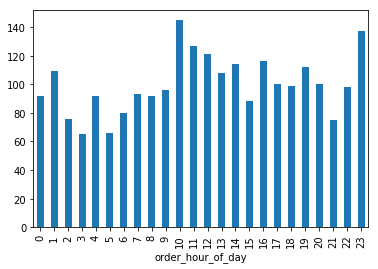

In [17]:
#max size of each order for each hour of the day regardless of day
order_size.groupby('order_hour_of_day')['order_size'].max().plot(kind='bar');


In [23]:
order_summary=order_size.groupby(['order_dow','order_hour_of_day'])['order_size'].agg(['mean','min','max']).reset_index()
order_summary.head()

,order_dow,order_hour_of_day,mean,min,max
0,0,0,10.529794,1,86
1,0,1,10.077405,1,93
2,0,2,9.795997,1,44
3,0,3,9.967342,1,62
4,0,4,11.162667,1,61


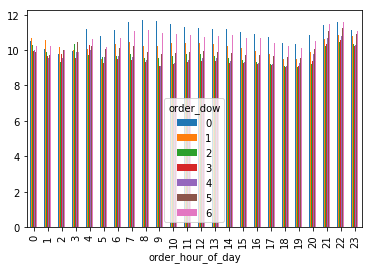

In [32]:
order_mean=order_summary.pivot(index='order_hour_of_day',columns='order_dow',values='mean')
order_max = order_summary.pivot(index='order_hour_of_day',columns = 'order_dow',values='max')
order_min = order_summary.pivot(index='order_hour_of_day',columns='order_dow',values='min')

#plot the meam size of orders for each hour of the day by day of week

order_mean.plot(kind='bar');

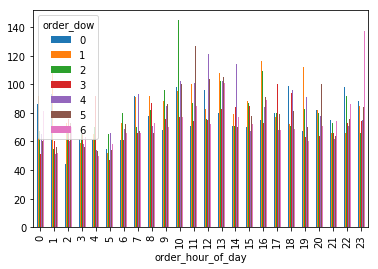

In [33]:
#plot the max size of orders for each hour of the day by day of week
order_max.plot(kind='bar');

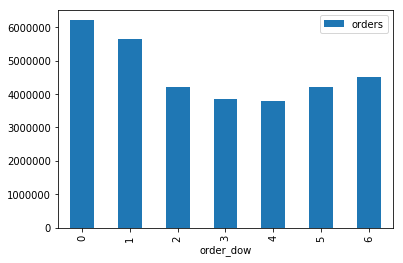

In [45]:
#plot the number of orders for each day
order_count=orders1.groupby(['order_dow'])['order_id'].count().reset_index(name='orders')
order_count.plot(kind='bar',x='order_dow',y='orders');

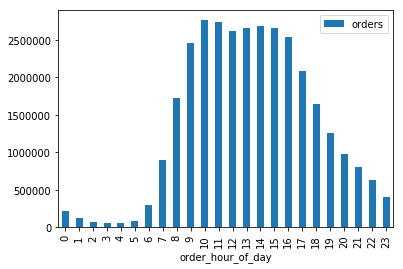

In [46]:
order_hour_frequency = orders1.groupby(['order_hour_of_day'])['order_id'].count().reset_index(name='orders')
#plot the number of orders by hour
order_hour_frequency.plot(kind='bar',x='order_hour_of_day',y='orders');

In [47]:
orders1.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7


In [72]:
product_count=orders1.groupby(['order_dow','product_name'])['product_name'].count().reset_index(name='product_count')